# Student Exam Performance Prediction

## 1 - Import data

#### Predict whether a student will pass (1) or fail (0) an exam.

Data from https://www.kaggle.com/datasets/mrsimple07/student-exam-performance-prediction

In [1]:
# Import basics packages
import pandas as pd                                     # Provides the DataFrame structure
import numpy as np

# Import sklearn functions
from sklearn.model_selection import train_test_split    # Provides split function to train and test the dataset
from sklearn.linear_model import LinearRegression       # Porvides LinearRegression() function
from sklearn.metrics import mean_squared_error as MSE

# Import interactive visualizations
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D                 # Visualization 3D


In [2]:
df = pd.read_csv("student_exam_data.csv")
df

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0
...,...,...,...
495,4.180170,45.494924,0
496,6.252905,95.038815,1
497,1.699612,48.209118,0
498,9.769553,97.014241,1


## 2 - Dispersion diagram

<IPython.core.display.Javascript object>


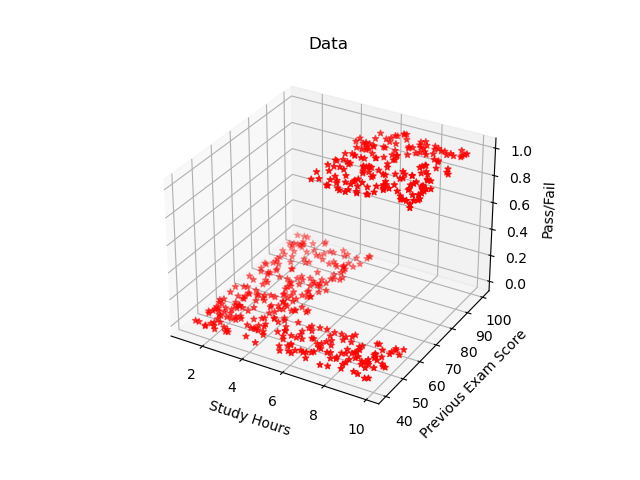

In [3]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

x = df['Study Hours']
y = df['Previous Exam Score']
z  = df['Pass/Fail']

ax.scatter(x, y, z, marker='*', c='r')
ax.set_xlabel('Study Hours')               # Etiqueta del eje X
ax.set_ylabel('Previous Exam Score')       # Etiqueta del eje Y
ax.set_zlabel('Pass/Fail');                # Etiqueta del eje Z (Var. Respuesta)
plt.title('Data')
plt.show()

## 3 - Split data into Training and Test set

In [4]:
# Divide dataset into 'X' predictors and 'y' target

X = df.drop(['Pass/Fail'], axis = 1)
y = df[['Pass/Fail']]

In [5]:
# Split data 80% training and 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4 - Model predict

In [6]:
# Creating a regression model 
lin_reg = LinearRegression()

# Fit the model with training data
lin_reg.fit(X_train.values,  y_train.values)

LinearRegression()

In [7]:
# Theta parameter 0
lin_reg.intercept_

array([-1.09120424])

In [8]:
# Theta parameter 1, 2
lin_reg.coef_

array([[0.10334185, 0.01282582]])

## 5 - Multiple Linear Regression

<IPython.core.display.Javascript object>


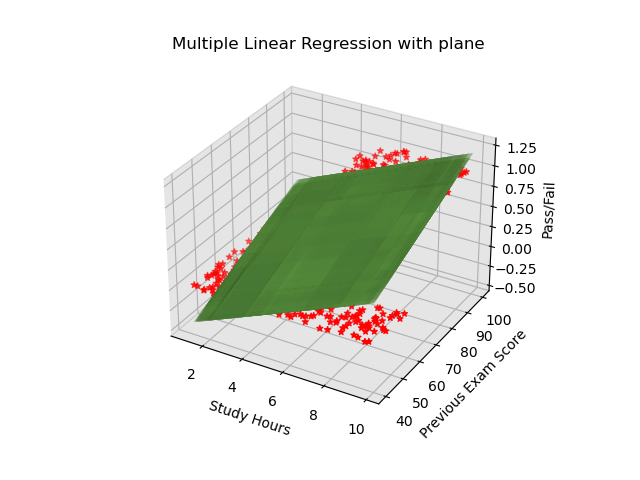

In [9]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

x = df['Study Hours']
y = df['Previous Exam Score']
z  = df['Pass/Fail']

ax.scatter(x, y, z, marker='*', c='r')
ax.set_xlabel('Study Hours')               # Etiqueta del eje X
ax.set_ylabel('Previous Exam Score')       # Etiqueta del eje Y
ax.set_zlabel('Pass/Fail');                # Etiqueta del eje Z (Var. Respuesta)
plt.title('Multiple Linear Regression with plane')

# Fit a plane using np.linalg.lstsq
A = np.vstack([x, y, np.ones_like(x)]).T
plane_coef, _, _, _ = np.linalg.lstsq(A, z, rcond=None)

# Create a meshgrid for the plane
x_plane, y_plane = np.meshgrid(x, y)
z_plane = plane_coef[0] * x_plane + plane_coef[1] * y_plane + plane_coef[2]

# Add the regression plane // to select color plane: https://rgbcolorpicker.com/0-1
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.1, color = (0.49, 0.788, 0.349, 0.38))

# If you want to change the background color: RGBA(Red, Green, Blue, Alpha)
ax.xaxis.set_pane_color((0, 0, 0, 0.1))
ax.yaxis.set_pane_color((0, 0, 0, 0.1))
ax.zaxis.set_pane_color((0, 0, 0, 0.1))

plt.show()

### PROBLEM:
- The problem is that – from some viewing angles – a 3D object would appear in front of another object, even though it is physically behind it. This can result in plots that do not look “physically correct.”
    
- I will leave a link about the problem if you want to know more information, and how to solve it:
<a href="https://stackoverflow.com/questions/39144482/matplotlib-plot-surface-transparency-artefact">Click here</a>

### In this position you can see the plane better.
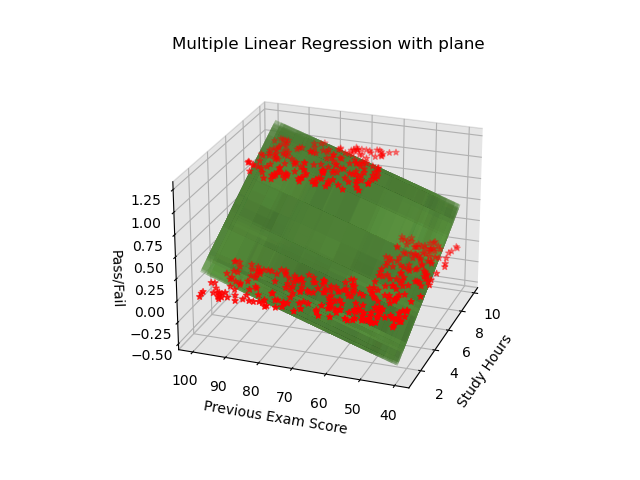

## 6 - Make predictions on the test dataset

In [10]:
predictions = lin_reg.predict(X_test.values)

### The multilinear regression model will be evaluated with the metric mean_squared_error (MSE).

- Mean Squared Error (MSE):
$$
    J(θ) = 
    \frac{ 1 }{ n }
    \sum_{i=1}^{n} (h_{θ}(x^{i}) - y^{i})^{2}
$$


In [11]:
# Model evaluation with data test
print( 
  'Mean_Squared_Error : ', MSE(y_test.values, predictions))

Mean_Squared_Error :  0.12176568902308754
